# Tutorial

This notebook shows an example Exploratory Data Analysis utilizing Data Describe.

In [1]:
import mwdata as mw

c:\tools\conda37-datadescribe\lib\site-packages\ipykernel\parentpoller.py:116: UserWarning: Parent poll failed.  If the frontend dies,
                the kernel may be left running.  Please let us know
                about your system (bitness, Python, etc.) at
                ipython-dev@scipy.org
  ipython-dev@scipy.org""")


## Data
This tutorial uses toy datasets from sklearn. For loading real datasets, consider using the `mw.load_data` wrapper! Try `help(mw.load_data)` for more information.

In [2]:
help(mw.load_data)

Help on function load_data in module mwdata.utilities.load_data:

load_data(filepath, kwargs=None)
    Create pandas data frame from filepath
    
    Args:
        filepath: The file path
        kwargs: Keyword arguments to pass to the reader
            .shp: Uses geopandas.read_file
            .csv, .json, and other: Uses pandas.read_csv or pandas.read_json
    
    Returns:
        A pandas data frame



In [3]:
from sklearn.datasets import load_boston
import pandas as pd

In [4]:
dat = load_boston()
df = pd.DataFrame(dat['data'], columns=dat['feature_names'])
df['price'] = dat['target']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## Data Overview

In [6]:
df.shape

(506, 14)

First we inspect some of the overall statistics about the data. Some examples of interesting things to note:
- 93% of `CHAS` are the same value, zero
- `ZN` also has a high amount of zeros
- The mean of `TAX` is significantly higher than the median, suggesting this is right-skewed

In [7]:
mw.data_summary(df)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,price
Data Type,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
Mean,3.61352,11.3636,11.1368,0.06917,0.554695,6.28463,68.5749,3.79504,9.54941,408.237,18.4555,356.674,12.6531,22.5328
Standard Deviation,8.60155,23.3225,6.86035,0.253994,0.115878,0.702617,28.1489,2.10571,8.70726,168.537,2.16495,91.2949,7.14106,9.1971
Median,0.25651,0,9.69,0,0.538,6.2085,77.5,3.20745,5,330,19.05,391.44,11.36,21.2
Min,0.00632,0,0.46,0,0.385,3.561,2.9,1.1296,1,187,12.6,0.32,1.73,5
Max,88.9762,100,27.74,1,0.871,8.78,100,12.1265,24,711,22,396.9,37.97,50
# Zeros,0,372,0,471,0,0,0,0,0,0,0,0,0,0
# Nulls,0,0,0,0,0,0,0,0,0,0,0,0,0,0
% Most Frequent Value,0.4,73.52,26.09,93.08,4.55,0.59,8.5,0.99,26.09,26.09,27.67,23.91,0.59,3.16


We can also look at a visual representation of the data as a heatmap:

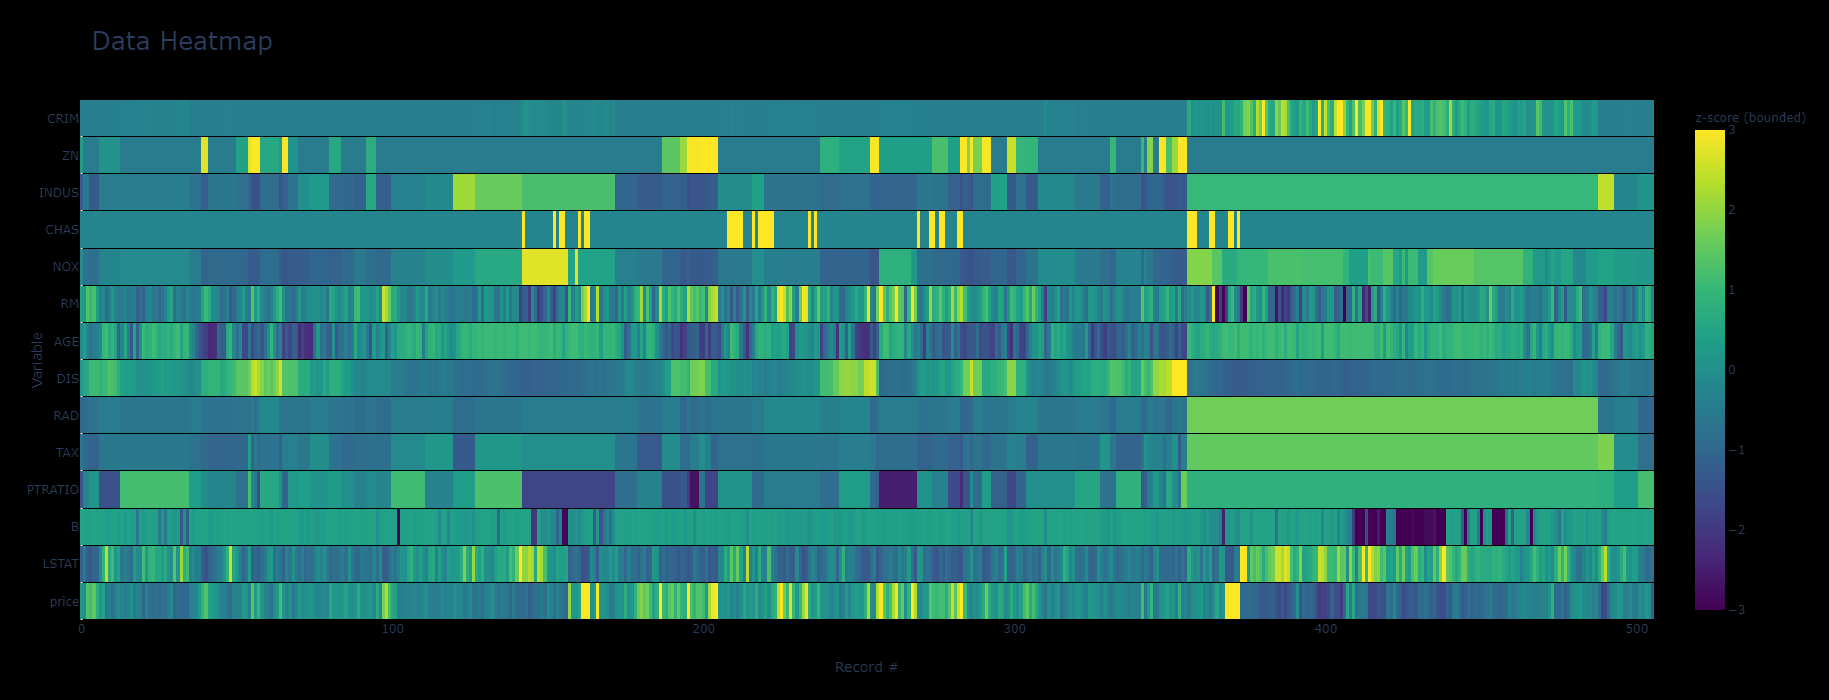

In [8]:
mw.data_heatmap(df)

There are some sections of the data which have exactly the same values for some columns. For example, `RAD` = 1.661245 between record number 356 ~ 487. Similar patterns appear for `INDUS` and `TAX`. Is this a sorting issue or is there something else going on? Some additional investigation into data collection may answer these questions.

We can also look at the correlations:

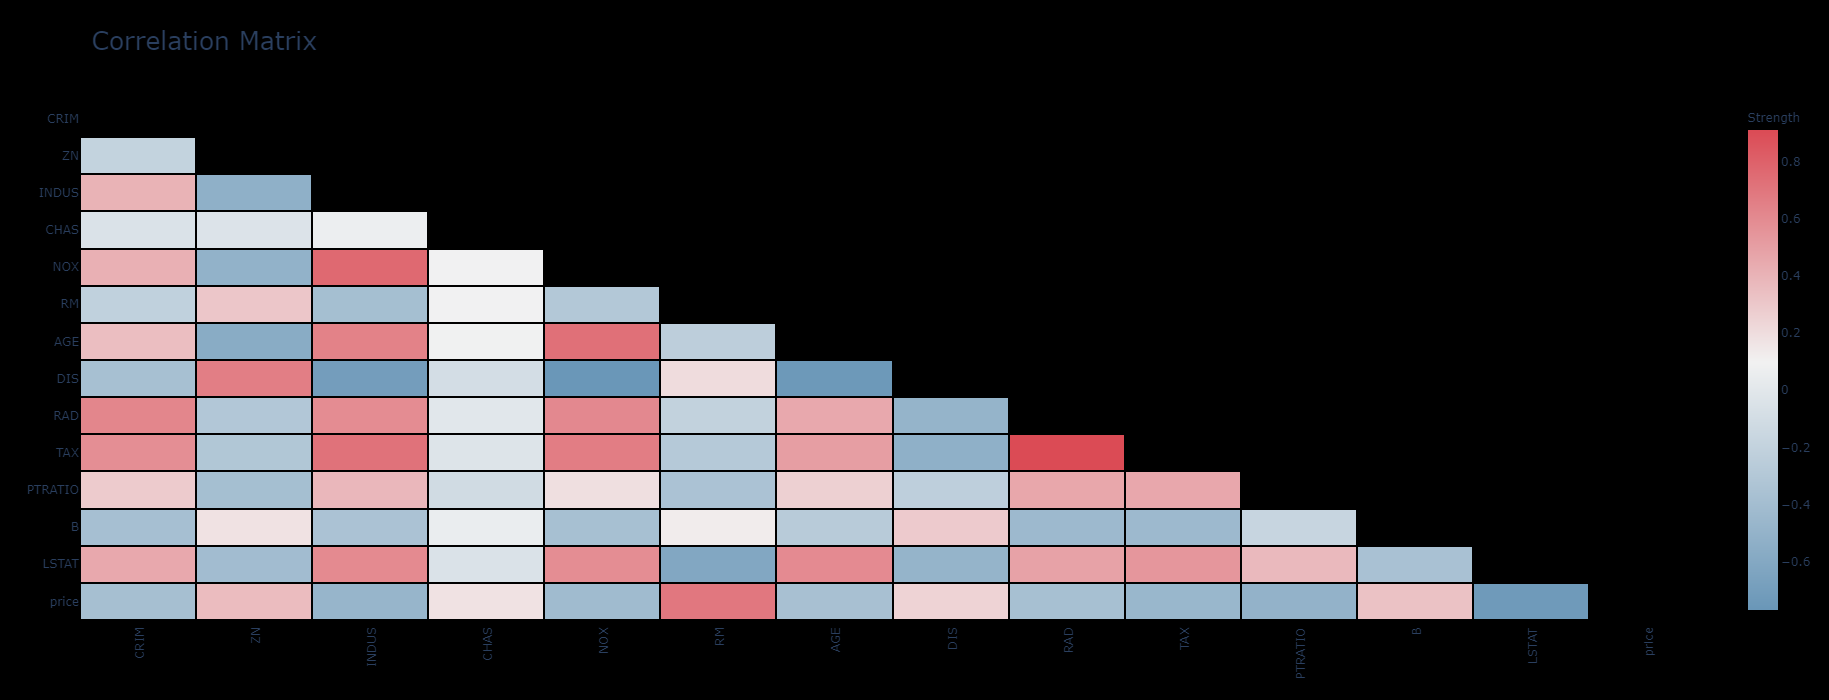

In [9]:
mw.correlation_matrix(df)

Features like `AGE` and `DIS` appear to be inversely correlated. `CHAS` doesn't appear to have strong correlation with any other feature.

It might also help to re-order the features for comparisons using the `cluster` argument.

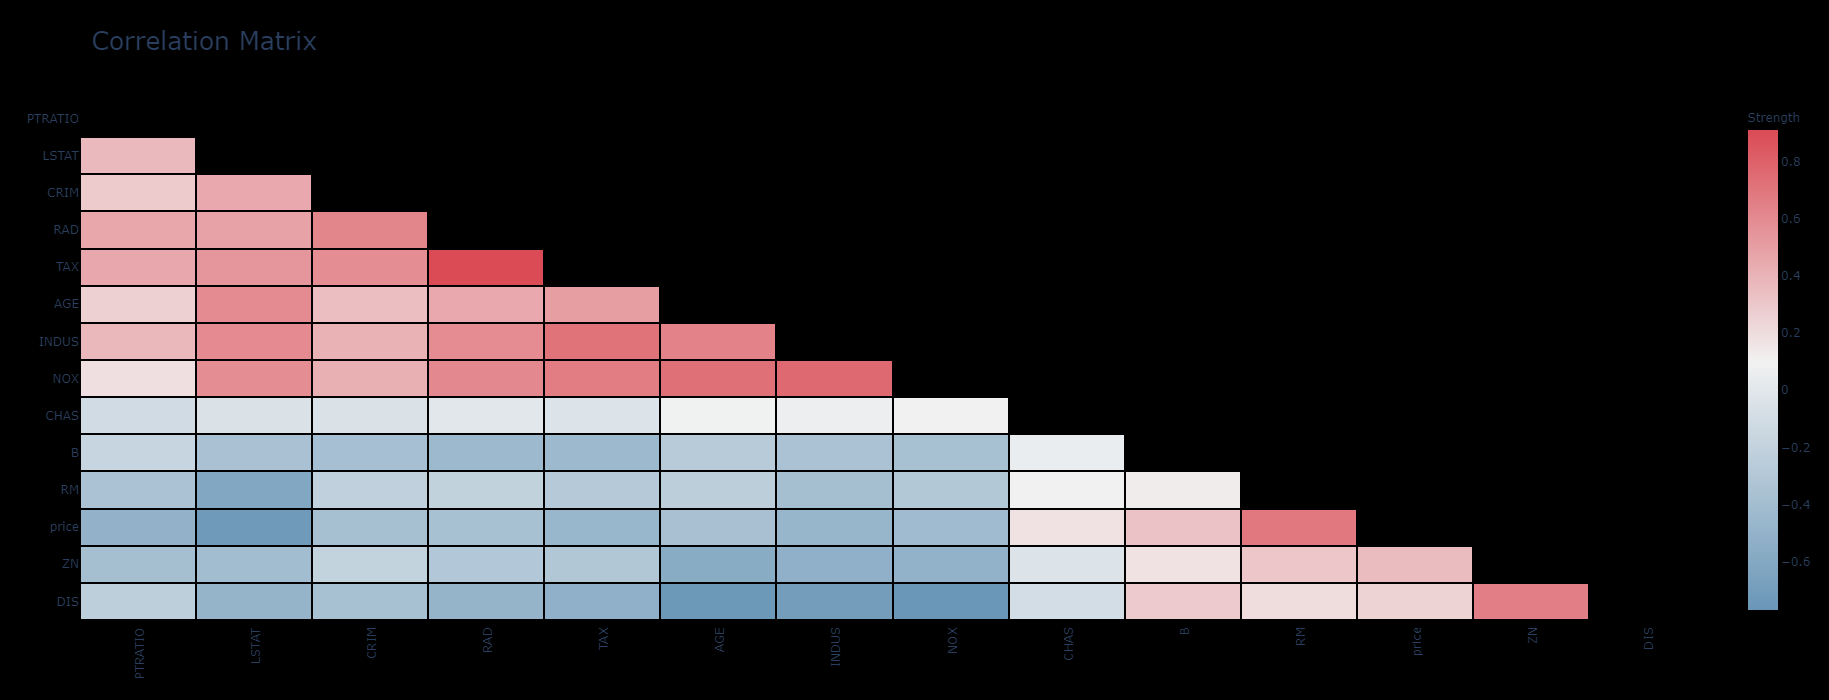

In [10]:
mw.correlation_matrix(df, cluster=True)

From this plot we can observe there are are two inversely related groups of features: `PTRATIO` to `NOX` and `B` to `DIS`.

## Data Inspection
We can also do some more detailed inspection of indiviudal features. 

We can show histograms and violin plots of each numeric feature using the `mw.distribution` function.

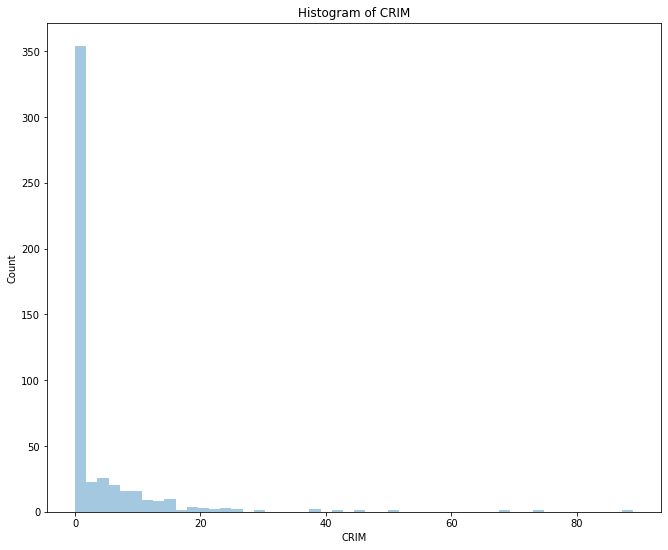

In [11]:
# Note: this is an error with the current version 0.2a
mw.distribution(df, plot_all=True)

We can also look at bivariate distributions using scatter plots. In addition to plotting all pairs in a scatterplot matrix, we can also specify a filter for certain scatterplot diagnostic features.

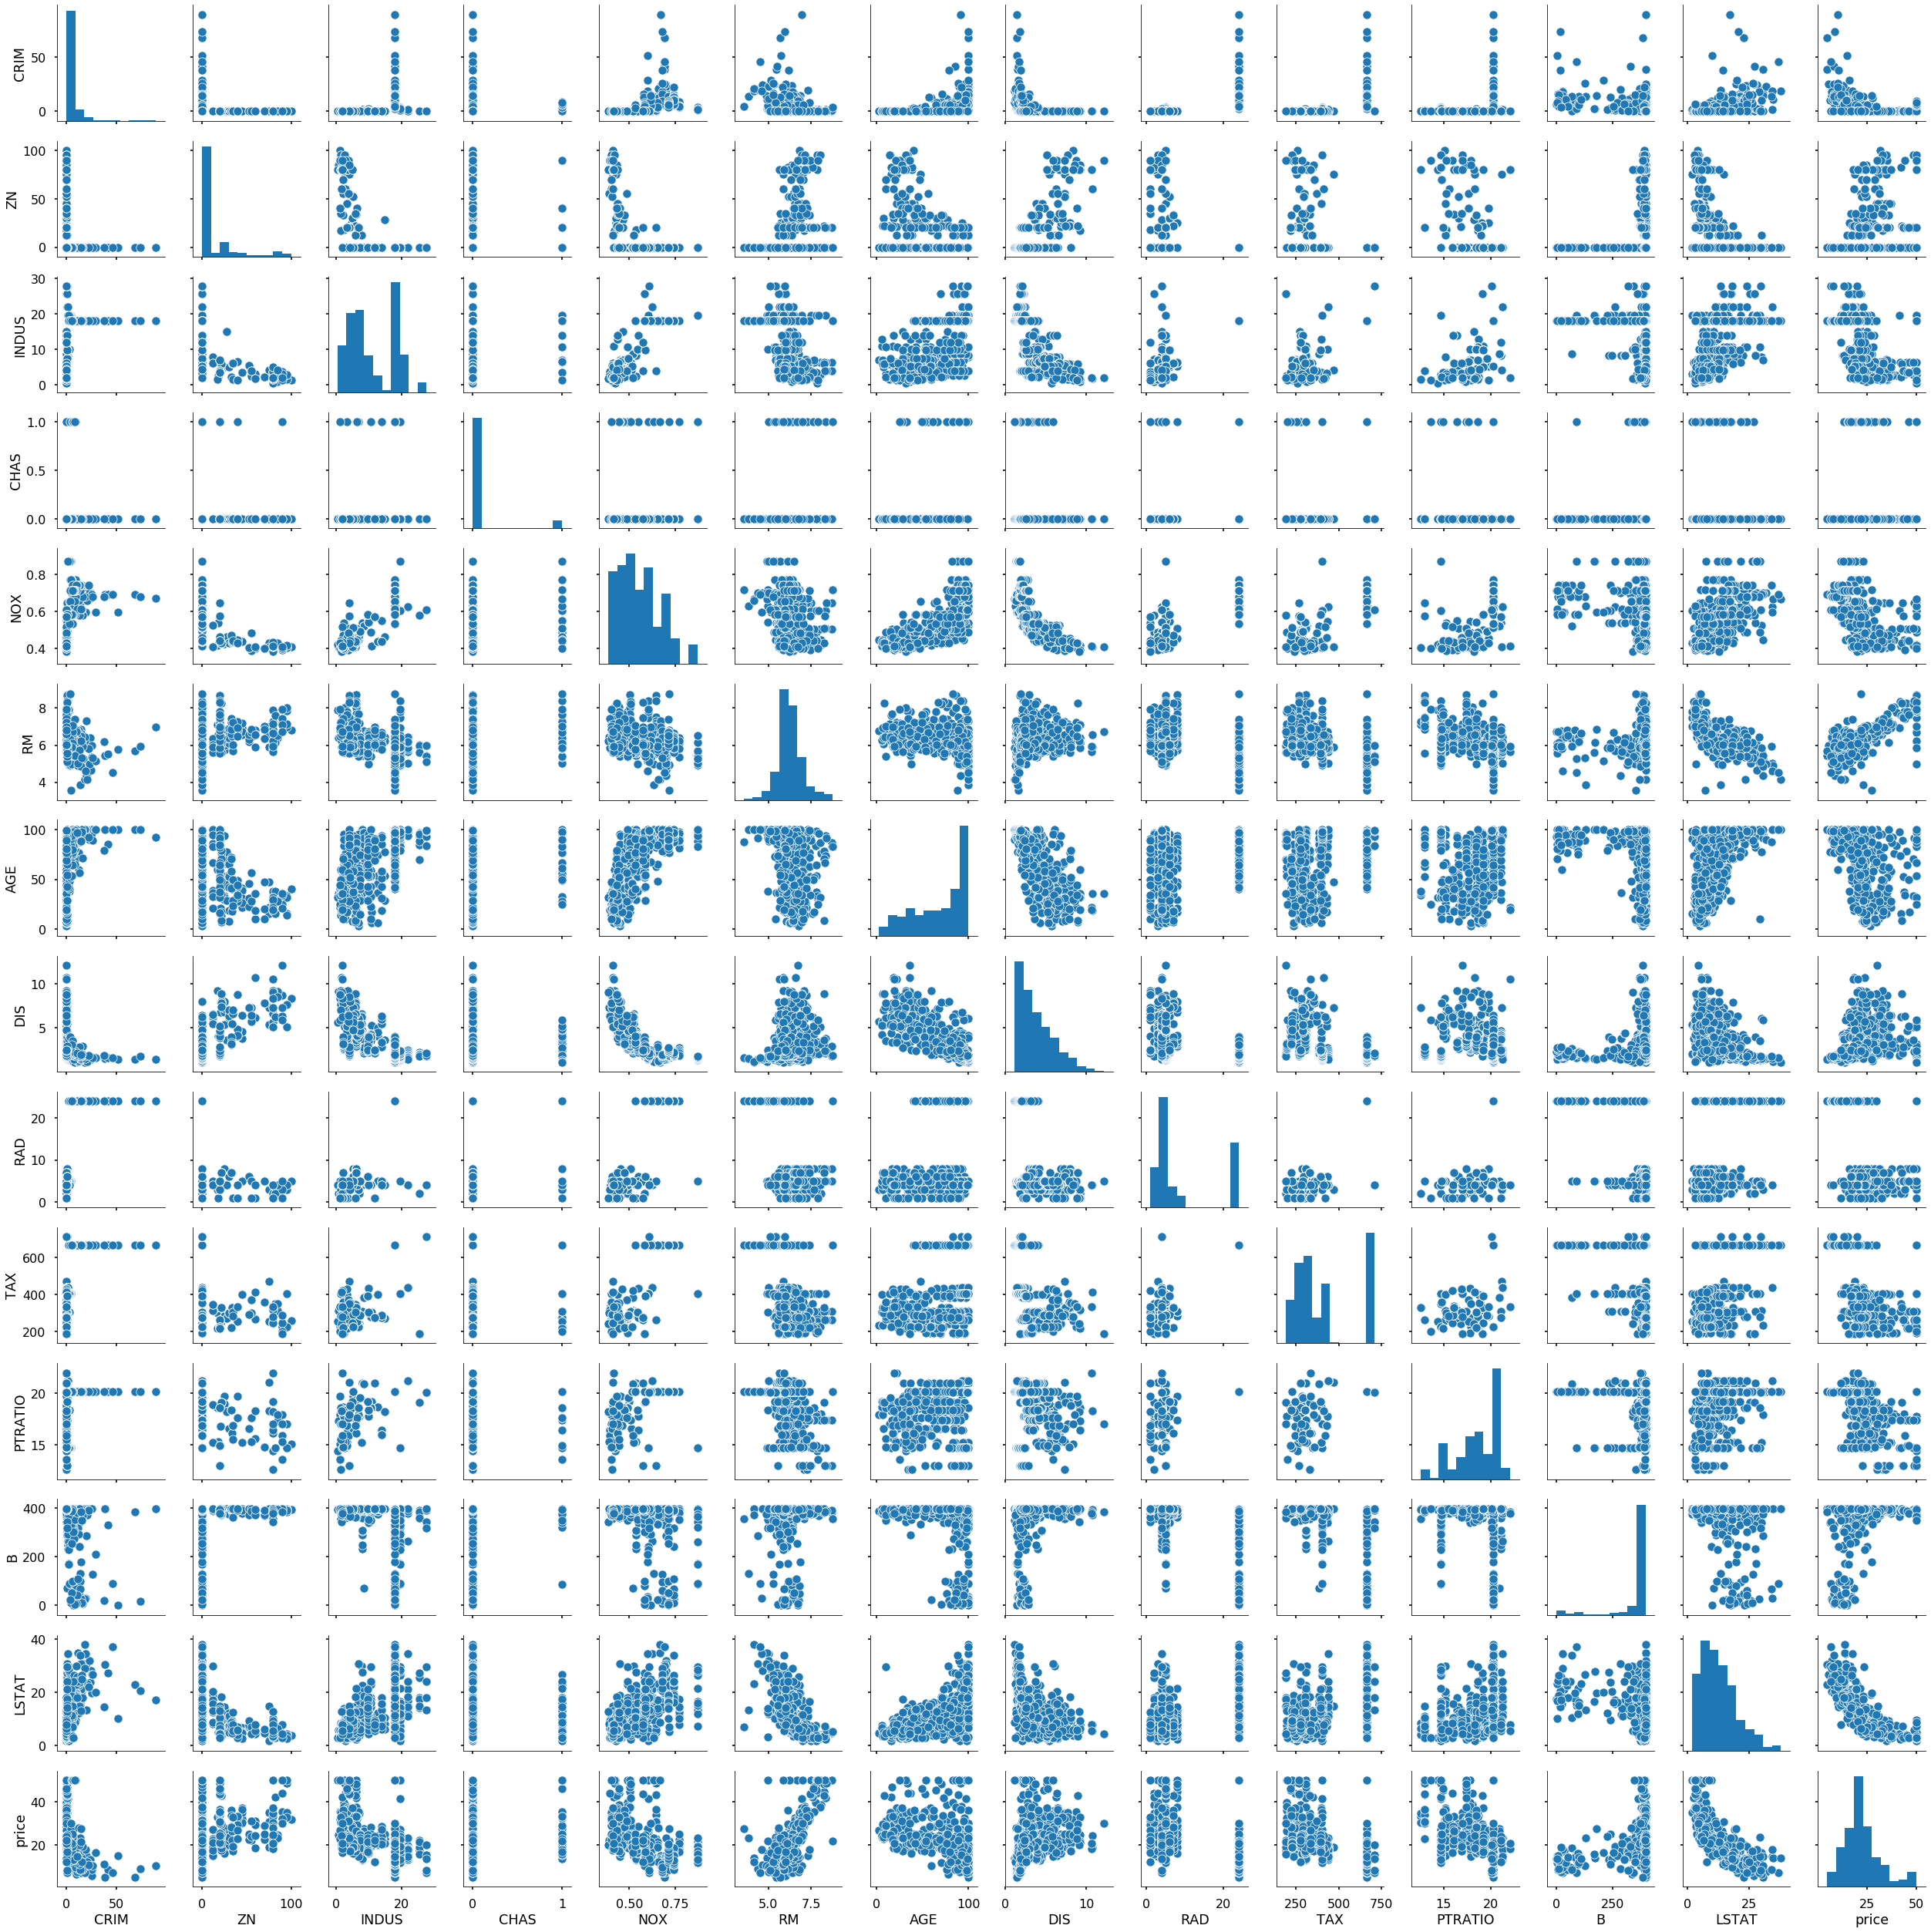

In [12]:
mw.scatter_plots(df, plot_mode='matrix')

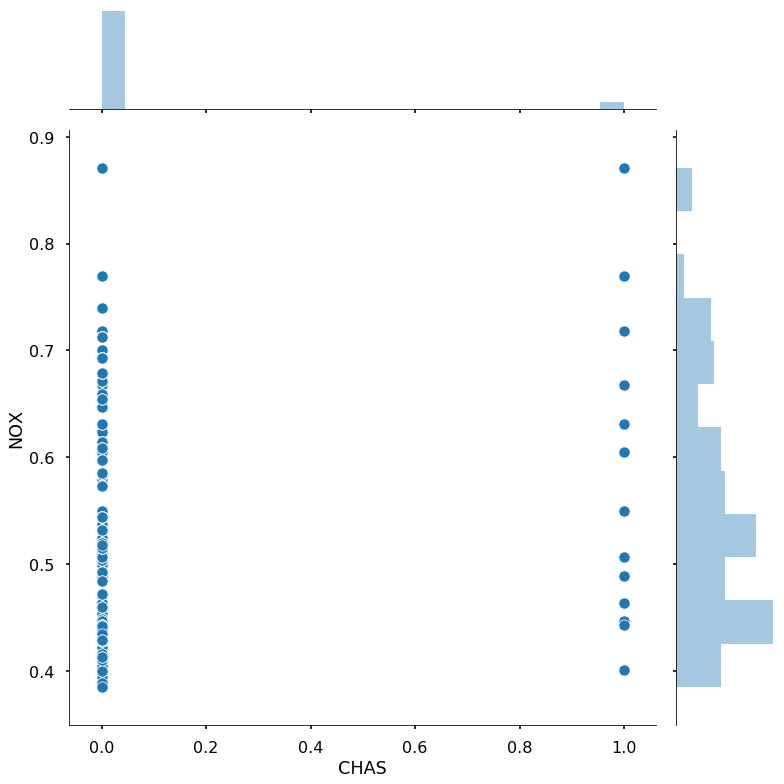

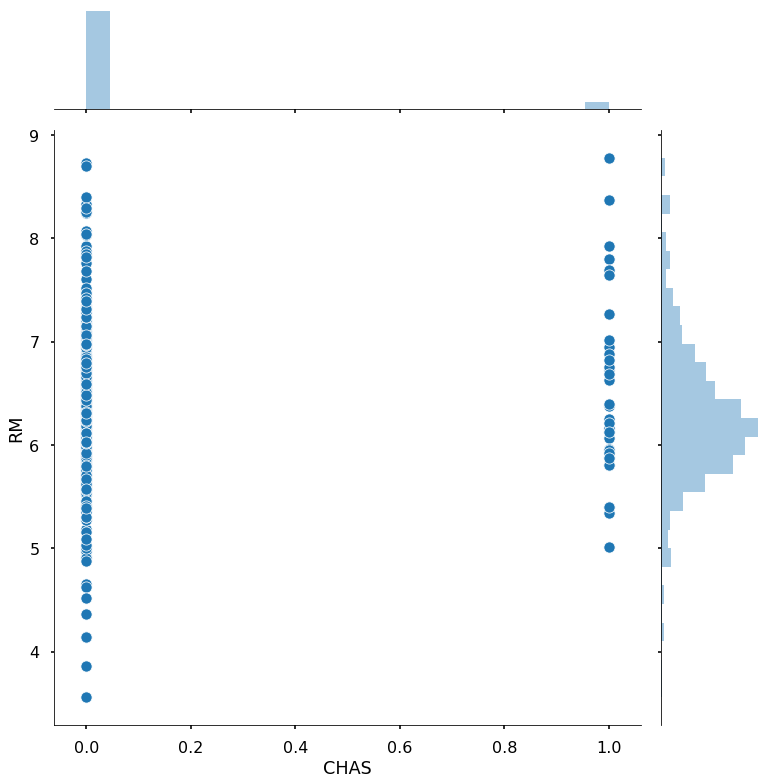

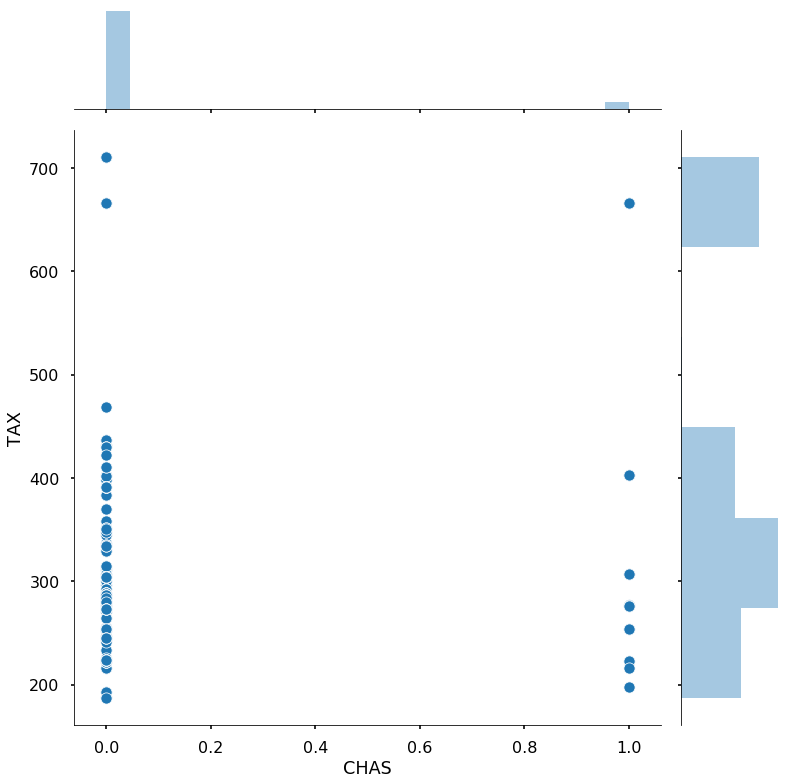

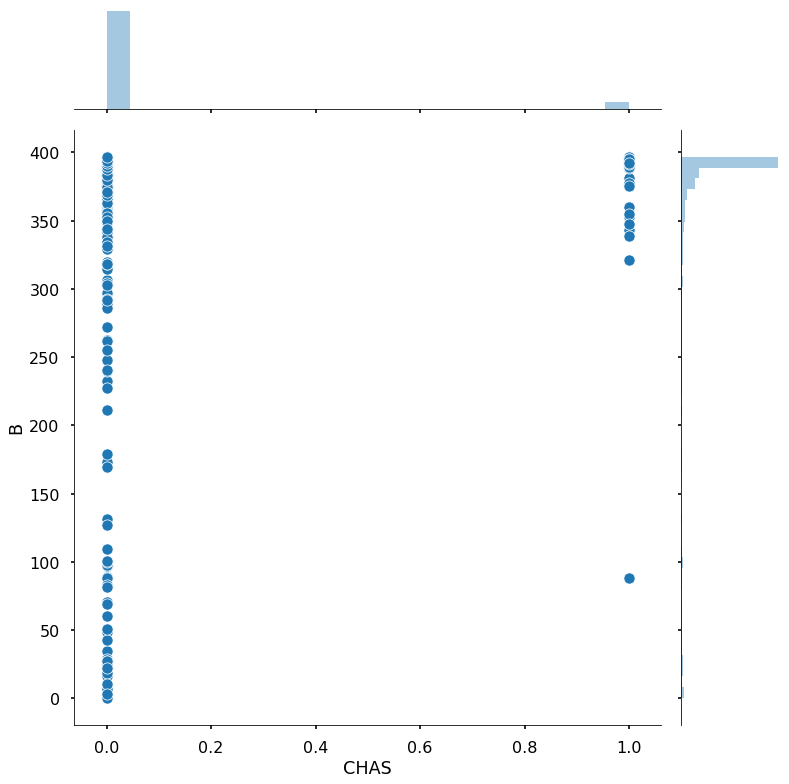

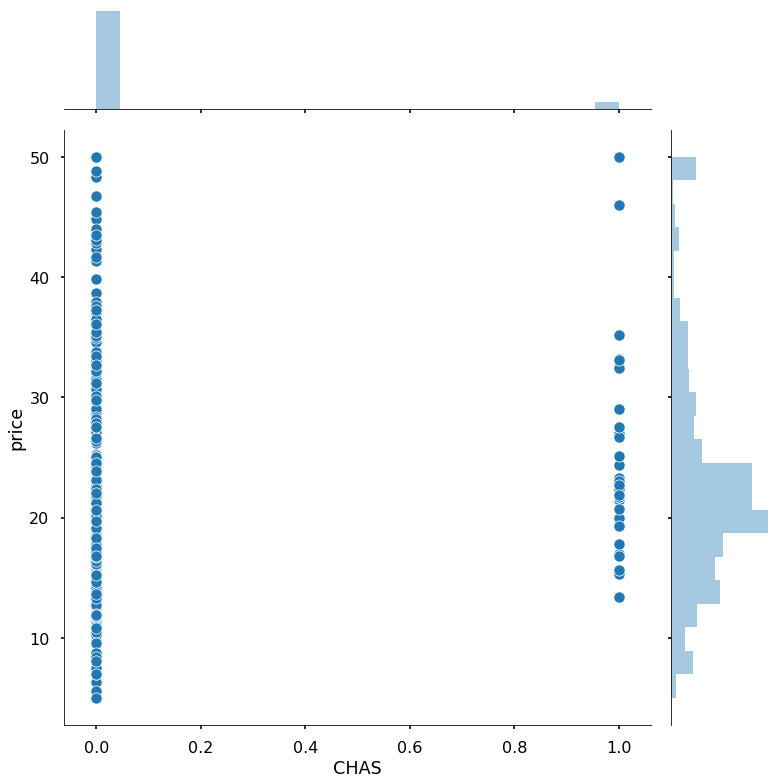

In [13]:
mw.scatter_plots(df, threshold={'Outlier': 0.9})

## Advanced Analysis
In addition to general plots, we can also use some ML-specific analyses as shown below.

### Cluster Analysis
What segments or groups are present in the data?

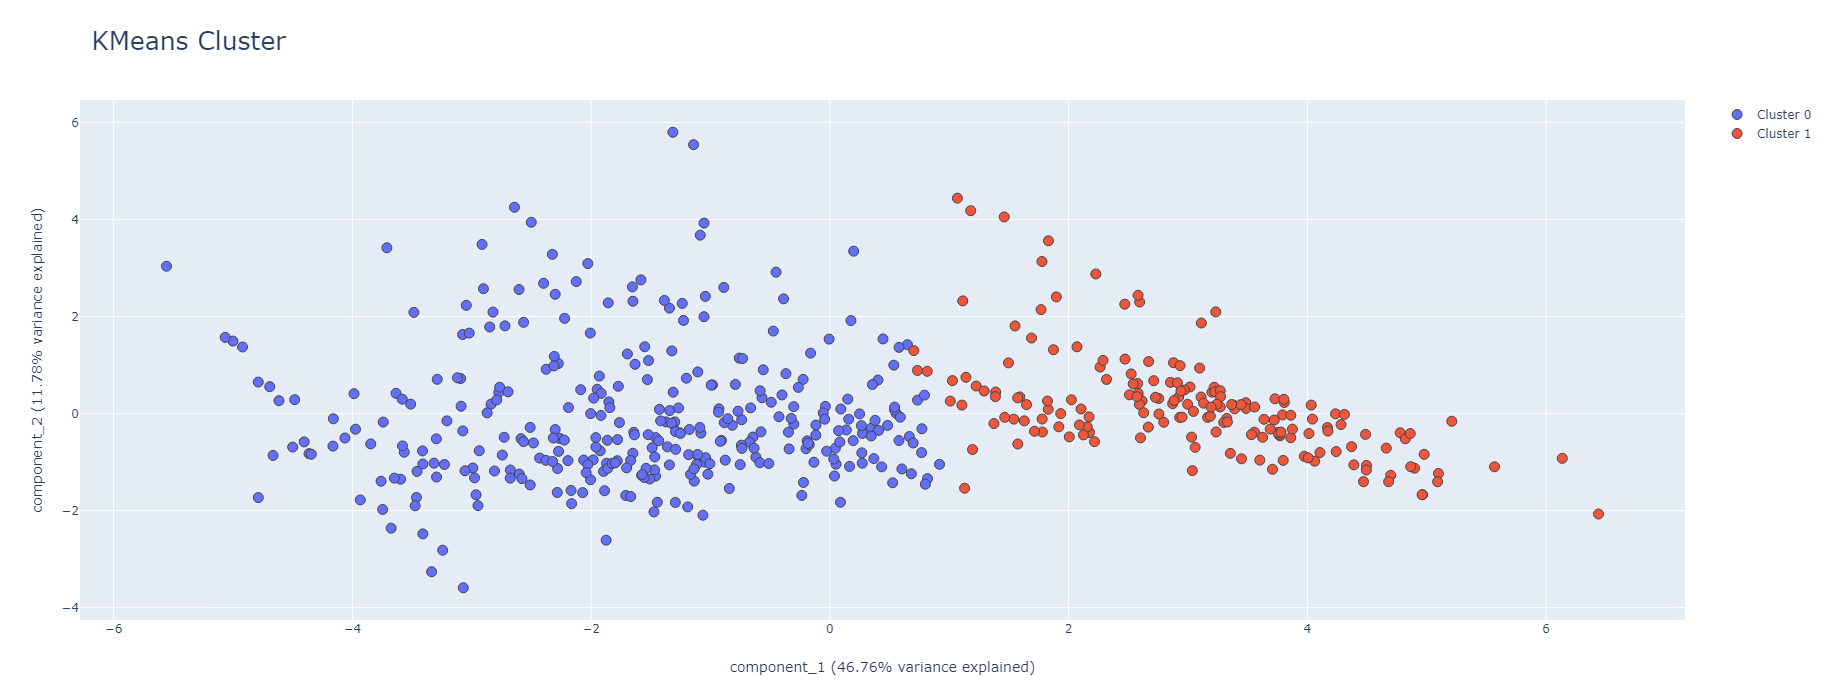

In [14]:
mw.cluster(df)

From this plot, we see that there does not appear to be strongly distinct clusters in the data.

### Feature Importance

Which features are most predictive of price? We use Random Forest as a baseline model to test for importance.

In [15]:
from sklearn.ensemble import RandomForestRegressor

Text(0.5, 1.0, 'Feature Importance')

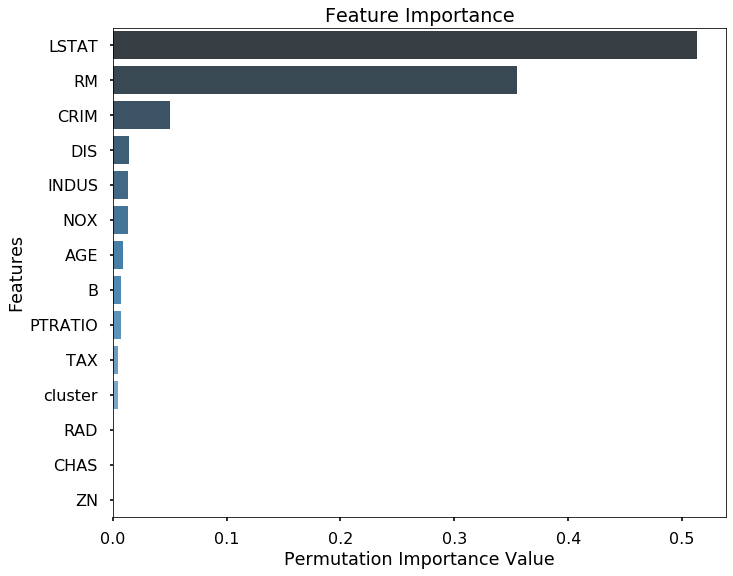

In [16]:
mw.importance(df, 'price', estimator=RandomForestRegressor(random_state=42))

It appears that `LSTAT` and `RM` are most important for predicting price.

### Topic Modeling
Since the Boston housing data set does not contain textual features, the 20 newsgroups text dataset is used to demonstrate the **Topic Modeling** widget.

In [17]:
from sklearn.datasets import fetch_20newsgroups

In [18]:
dat = fetch_20newsgroups(subset='test')
df2 = pd.DataFrame({'text': dat['data']})
df2 = df2.sample(150)

In [19]:
df2.head()

,text
1656,Subject: Re: Fractal terrain generator?\nFrom:...
7354,From: d_jaracz@oz.plymouth.edu (David R. Jarac...
3375,From: karljo@imv.aau.dk (Karl Johan Olsen)\nSu...
2060,From: jimdean@bnr.ca (Jim Dean)\nSubject: Re: ...
2603,From: sjcostan@magnus.acs.ohio-state.edu (Scot...


Text preprocessing can be applied before topic modeling to improve accuracy.

In [20]:
from mwdata.text.text_preprocessing import preprocess_texts, bag_of_words_to_docs
processed = preprocess_texts(df2['text'])
text = bag_of_words_to_docs(processed)

In [21]:
from mwdata.text.topic_model import topic_modeling

c:\tools\conda37-datadescribe\lib\site-packages\gensim\utils.py:1197: UserWarning:

detected Windows; aliasing chunkize to chunkize_serial



In [22]:
topic_modeling(df2, col='text', num_topics=3)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.020183  0.021216       1        1  44.062103
1     -0.016556 -0.022660       2        1  32.191269
2      0.036739  0.001444       3        1  23.746634, topic_info=    Category       Freq                     Term      Total  loglift  logprob
12   Default  53.000000  organization_university  53.000000  30.0000  30.0000
111  Default  20.000000                   window  20.000000  29.0000  29.0000
17   Default  36.000000                   system  36.000000  28.0000  28.0000
6    Default  30.000000               doe_anyone  30.000000  27.0000  27.0000
52   Default  26.000000                    drive  26.000000  26.0000  26.0000
50   Default  23.000000                 computer  23.000000  25.0000  25.0000
8    Default  27.000000                     file  27.000000  24.0000  24.0000
105  Default  24.000000                     real  24.000000  23.0000  23.0000
14   Default  21.000000                  program  21.000000  22.0000  22.0000
153  Default  13.000000                  looking  13.000000  21.0000  21.0000
68   Default  30.000000                     used  30.000000  20.0000  20.0000
130  Default  26.000000                     help  26.000000  19.0000  19.0000
18   Default  15.000000                   thanks  15.000000  18.0000  18.0000
183  Default  16.000000                     mike  16.000000  17.0000  17.0000
135  Default  33.000000       distribution_world  33.000000  16.0000  16.0000
142  Default  22.000000                     type  22.000000  15.0000  15.0000
13   Default  31.000000                   please  31.000000  14.0000  14.0000
48   Default  19.000000                     call  19.000000  13.0000  13.0000
139  Default  28.000000                    power  28.000000  12.0000  12.0000
141  Default  21.000000                    start  21.000000  11.0000  11.0000
37   Default  16.000000              information  16.000000  10.0000  10.0000
128  Default  11.000000                 response  11.000000   9.0000   9.0000
20   Default  11.000000                    under  11.000000   8.0000   8.0000
155  Default  12.000000                   others  12.000000   7.0000   7.0000
91   Default  14.000000                   though  14.000000   6.0000   6.0000
16   Default  26.000000                something  26.000000   5.0000   5.0000
76   Default  32.000000                  believe  32.000000   4.0000   4.0000
25   Default  21.000000                     mail  21.000000   3.0000   3.0000
149  Default  15.000000                     john  15.000000   2.0000   2.0000
100  Default  18.000000                     made  18.000000   1.0000   1.0000
..       ...        ...                      ...        ...      ...      ...
67    Topic3   5.889862                    still  15.527094   0.4684  -5.0945
0     Topic3   6.901415                   access  18.432222   0.4554  -4.9360
135   Topic3  12.642880       distribution_world  33.816296   0.4539  -4.3307
7     Topic3   6.279848                    email  16.917175   0.4467  -5.0304
78    Topic3   4.049860                     each  11.256799   0.4154  -5.4691
158   Topic3   5.820155                  through  16.230448   0.4122  -5.1064
8     Topic3   9.723238                     file  27.389725   0.4021  -4.5932
142   Topic3   7.746790                     type  22.182888   0.3857  -4.8205
13    Topic3  11.156454                   please  31.995462   0.3842  -4.4557
138   Topic3   4.868435                      one  14.050190   0.3779  -5.2850
83    Topic3   4.174084                   little  12.047599   0.3778  -5.4389
43    Topic3   5.033397                    wrote  14.751850   0.3625  -5.2517
58    Topic3   9.951445                     take  30.356297   0.3224  -4.5700
30    Topic3  11.188168                    world  38.671043   0.1975  -4.4529
31    Topic3  12.897883           writes_article  50.669090   0.0695  -4.3107
107   Topic3   9.3460

## Geospatial Mapping

Since the Boston housing dataset does not include geospatial markers, the XXX data set is used to demonstrate the **geospatial** mapping widget.

In [23]:
# This example is not yet available.

## Model Evaluation
While not strictly part of Exploratory Data Analysis, some widgets are also provided for evaluating binary classification models.

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
# Simple model
X = df[[c for c in df.columns if c != 'price']]
y = df.price.apply(lambda x: x > 20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = RandomForestClassifier(max_depth=3, n_estimators=10, random_state=4).fit(X_train, y_train)
pred = model.predict(X_test)
pred_proba = model.predict_proba(X_test)[:, 1]

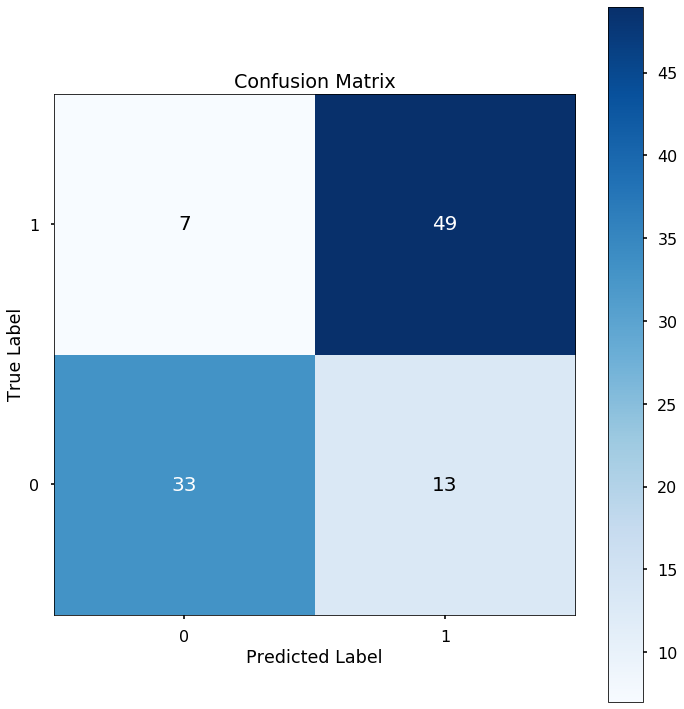

In [29]:
from mwdata.modeling.score import confusion_matrix
confusion_matrix(y_test, pred)

In [32]:
from mwdata.modeling.score import metric_table
metric_table(y_test, pred_proba)

,Accuracy,Precision,Recall,F1,AUC
0,0.823529,0.910714,0.796875,0.85,0.942023
